In [ ]:
!pip install lightgbm


     ---------------------------------------- 1.3/1.3 MB 58.9 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# EDA Libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler

# from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
import lightgbm as lgb
from sklearn.svm import SVC


# Statistical Analysis
from scipy.stats import chi2_contingency


# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import calibration_curve





In [71]:
!pip install category_encoders


     -------------------------------------- 81.9/81.9 kB 352.8 kB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 233.8/233.8 kB ? eta 0:00:00


In [4]:
!pip install imbalanced-learn

     ------------------------------------ 235.6/235.6 kB 379.5 kB/s eta 0:00:00


### Things to do
- Balance out the data
- Bin anything that speaks to frequency
- Remove redundant features
- Treat missing values after you group them by region
- The best way to remove and balance out outliers especially on anything that speaks to revenue
- The goal is create a model that is able to generalise as much as possible
- What other features can be used to make the model as generalised as much as possible. (Engineer features related to the business problem eg. Regularity - Frequency / amount) etc
- Hyper paremeter tuning with Bayesian Optimisation
- Stick with Logistic regression until you can't go any further with your results.
- Put on the hat of a scientist
- Do some Feature Engineering

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
X = train_data.drop('Target', axis=1)
y = train_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the data (oversample the minority class)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
df_resampled['Target'] = y_train_resampled


In [5]:
df_resampled['Target'].value_counts()

0    980020
1    980020
Name: Target, dtype: int64

In [6]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960040 entries, 0 to 1960039
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ID                object 
 1   region            object 
 2   tenure            object 
 3   Amount            float64
 4   refill_frequency  float64
 5   revenue           float64
 6   arpu_segment      float64
 7   frequency         float64
 8   data_volume       float64
 9   on_net            float64
 10  Procuct_1         float64
 11  Procuct_2         float64
 12  zone1             float64
 13  zone2             float64
 14  mrg               object 
 15  regularity        int64  
 16  top_pack          object 
 17  freq_top_pack     float64
 18  Target            int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 284.1+ MB


In [7]:
df_resampled['refill_frequency'].describe()

count    913203.000000
mean         10.485625
std          12.764966
min           1.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         133.000000
Name: refill_frequency, dtype: float64

In [8]:
churn = df_resampled[df_resampled['Target']==1]
churn['refill_frequency'].describe()

count    170076.000000
mean          4.346439
std           6.462793
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          85.000000
Name: refill_frequency, dtype: float64

In [ ]:
non_churn = df_resampled[df_resampled['Target']==0]
non_churn['refill_frequency'].describe()

In [ ]:
churn['refill_frequency'].hist()

In [ ]:
non_churn['refill_frequency'].hist()

In [ ]:
churn['regularity'].kde()

In [ ]:
sns.kdeplot(data, shade=True)

In [ ]:
non_churn['regularity'].hist()

In [ ]:
churn['frequency'].hist()

In [ ]:
non_churn['frequency'].hist()

In [25]:


# Sample data (replace this with your own DataFrame)
data = {'NumericFeature': [10, 20, 30, 40, 50, 60, 70, 80, 90]}
df = pd.DataFrame(data)

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

# Fit and transform the data
df['BinnedFeature'] = discretizer.fit_transform(df[['NumericFeature']])

c:\Users\UKASHI\anaconda3\envs\e-library\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


C:\Users\UKASHI\AppData\Local\Temp\ipykernel_3908\2148668414.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_churn['frequency'], shade=True)


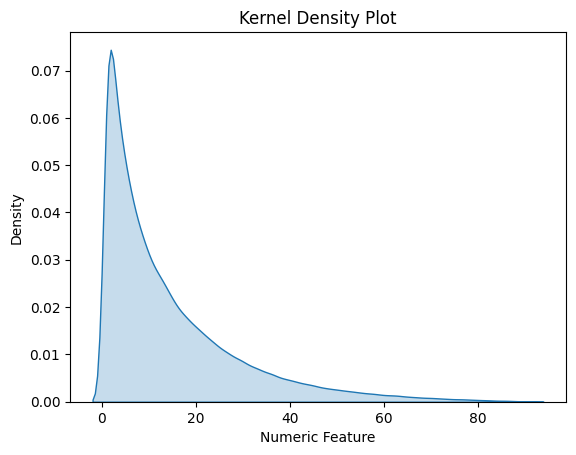

In [28]:
# Create a kernel density plot
sns.kdeplot(df, shade=True)

# Add labels and title
plt.xlabel('Numeric Feature')
plt.ylabel('Density')
plt.title('Kernel Density Plot')

# Show the plot
plt.show()

In [ ]:
# Create a kernel density plot with hue
sns.kdeplot(data=df_resampled, x='regularity', hue='Target', common_norm=False, fill=True)


In [7]:
df_resampled.isnull().sum()

ID                        0
region              1185866
tenure                    0
Amount              1046837
refill_frequency    1046837
revenue             1016833
arpu_segment        1016833
frequency           1016833
data_volume         1198939
on_net              1062191
Procuct_1           1160959
Procuct_2           1426946
zone1               1850463
zone2               1870321
mrg                       0
regularity                0
top_pack            1165905
freq_top_pack       1165905
Target                    0
dtype: int64

In [ ]:
# refill_frequency
# Create a kernel density plot with hue
sns.kdeplot(data=df_resampled, x='refill_frequency', hue='Target', common_norm=False, fill=True)

In [ ]:
# frequency
# Create a kernel density plot with hue
sns.kdeplot(data=df_resampled, x='frequency', hue='Target', common_norm=False, fill=True)

In [ ]:
# Amount
# Create a kernel density plot with hue
sns.kdeplot(data=df_resampled, x='freq_top_pack', hue='Target', common_norm=False, fill=True)

In [ ]:
df_resampled['refill_frequency'].describe()

In [ ]:
churn['refill_frequency'].describe()

In [124]:
non_churn['refill_frequency'].describe()

count    743127.000000
mean         11.890671
std          13.419299
min           1.000000
25%           3.000000
50%           7.000000
75%          16.000000
max         133.000000
Name: refill_frequency, dtype: float64

In [39]:
### Let us bin these guys using the KBinsDiscretizer

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

# Fit and transform the data
df_resampled['regularity_group'] = discretizer.fit_transform(df_resampled[['regularity']])

c:\Users\UKASHI\anaconda3\envs\e-library\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [41]:
df_resampled['regularity_group'].value_counts()

0.0    1197119
2.0     408793
1.0     354128
Name: regularity_group, dtype: int64

In [47]:
df_resampled[df_resampled['regularity_group']==2][['regularity']].describe()

,regularity
count,408793.000000
mean,55.557074
std,6.096749
min,43.000000
25%,51.000000
50%,57.000000
75%,61.000000
max,62.000000


In [ ]:
# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

# Fit and transform the data
df_resampled['refill_freq_group'] = discretizer.fit_transform(df_resampled[['refill_frequency']])

In [8]:
missing_values = dict(df_resampled.isnull().sum())

In [10]:
df_resampled['tenure'].value_counts()

K > 24 month     1843056
I 18-21 month      47816
H 15-18 month      27819
G 12-15 month      17087
J 21-24 month      12614
F 9-12 month        9424
E 6-9 month         1562
D 3-6 month          662
Name: tenure, dtype: int64

## Fill in Missing values 
We assume that those in the same tenure behave similarly - check this assumption (Let's test this)

### T-Test or ANOVA

In [57]:
from scipy.stats import ttest_ind, f_oneway

# Example t-test for two regions
region_A = df_resampled[df_resampled['tenure'] == 'K > 24 month']['regularity']
region_B = df_resampled[df_resampled['tenure'] == 'I 18-21 month']['regularity']

t_stat, p_value = ttest_ind(region_A, region_B)

# Print the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: 40.543152229528694
P-Value: 0.0


In [63]:

df_resampled[df_resampled['tenure'] == 'K > 24 month']['Amount'].describe()

count    868654.000000
mean       2168.387224
std        2924.480725
min           4.270000
25%         427.350000
50%        1111.110000
75%        2820.510000
max      124145.300000
Name: Amount, dtype: float64

In [ ]:
# Example box plot
# sns.boxplot(x='tenure', y='revenue', data=df_resampled)
# plt.show()

# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 12))  # Set the size of the plot

# Assuming df is your DataFrame with categorical and target variables
sns.boxplot(x='tenure', y='revenue', data=df_resampled)
plt.title('Box Plot of Revenue againt Tenure')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()

We will use the median values by the Tenure to fill in the missing values:

In [6]:
non_categorical_columns = ['Amount', 'refill_frequency', 'revenue', 'arpu_segment', 'frequency',
       'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1', 'zone2',
       'regularity', 'freq_top_pack', 'Target']

In [9]:
for key, value in missing_values.items():
    if value > 0 and key in non_categorical_columns:   # Feature has a missing value and is non categorical (numerical)
        # Group by tenure and compute the median
        tenure_median = df_resampled.groupby('tenure')[key].transform('mean')  # Use the median next time - you actually used mean.
        # Fill missing values with their corresponding tenure mean
        df_resampled[key] = df_resampled[key].fillna(tenure_median)
        
        


In [10]:
for key, value in missing_values.items():
    if value > 0 and key in non_categorical_columns:   # Feature has a missing value and is non categorical (numerical)
        # Group by tenure and compute the median
        tenure_median = test_data.groupby('tenure')[key].transform('mean')  # Use the median next time - you actually used mean.
        # Fill missing values with their corresponding tenure mean
        test_data[key] = test_data[key].fillna(tenure_median)

In [11]:
test_data.isnull().sum()

ID                       0
region              149728
tenure                   0
Amount                   0
refill_frequency         0
revenue                  0
arpu_segment             0
frequency                0
data_volume              0
on_net                   0
Procuct_1                0
Procuct_2                0
zone1                    0
zone2                    0
mrg                      0
regularity               0
top_pack            158779
freq_top_pack            0
dtype: int64

In [ ]:
tenure_median

In [12]:
categorical = ['region', 'top_pack']
for cat in categorical:
    # Group by 'Region' and fill missing categorical values with mode
    df_resampled[cat] = df_resampled.groupby('tenure')[cat].transform(lambda x: x.fillna(x.mode().iloc[0]))
    test_data[cat] = test_data.groupby('tenure')[cat].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [13]:
df_resampled.isnull().sum()

ID                  0
region              0
tenure              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
zone1               0
zone2               0
mrg                 0
regularity          0
top_pack            0
freq_top_pack       0
Target              0
dtype: int64

In [17]:
test_data.isnull().sum()

ID                  0
region              0
tenure              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
zone1               0
zone2               0
mrg                 0
regularity          0
top_pack            0
freq_top_pack       0
dtype: int64

C:\Users\UKASHI\AppData\Local\Temp\ipykernel_18760\1229569621.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_resampled.corr()


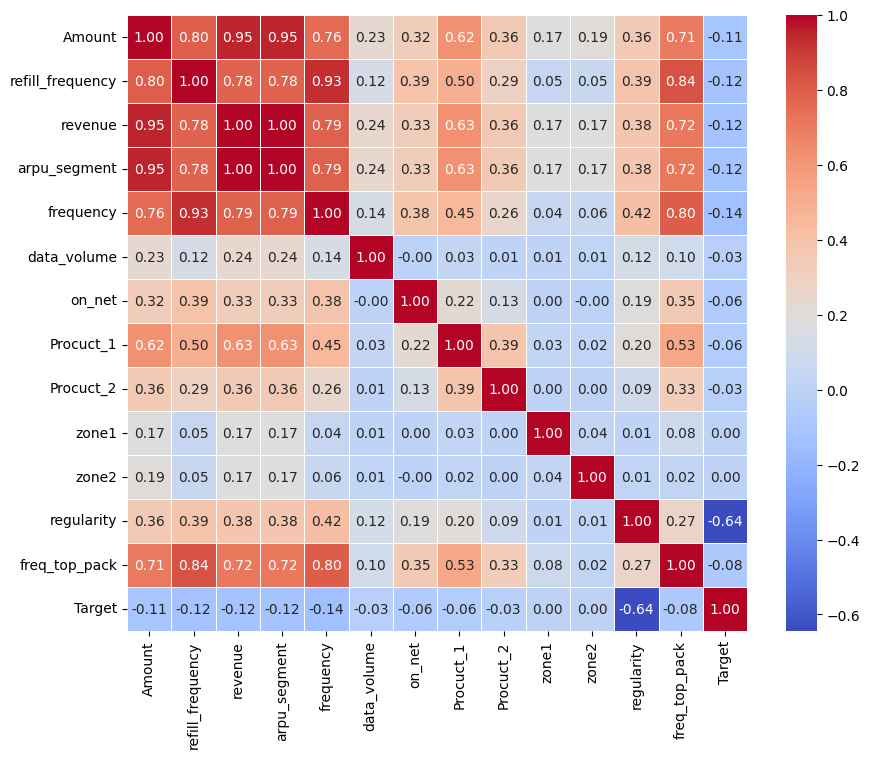

In [44]:
# Create a correlation matrix
correlation_matrix = df_resampled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

## Removing outliers in the dataset

In [ ]:
## Baseline 2

# Identify and remove categorical columns
non_categorical_columns = df_resampled.select_dtypes(exclude=['object']).columns
train_df = df_resampled[non_categorical_columns]

## Dealing with Categorical Data

In [150]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960040 entries, 0 to 1960039
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ID                object 
 1   region            object 
 2   tenure            object 
 3   Amount            float64
 4   refill_frequency  float64
 5   revenue           float64
 6   arpu_segment      float64
 7   frequency         float64
 8   data_volume       float64
 9   on_net            float64
 10  Procuct_1         float64
 11  Procuct_2         float64
 12  zone1             float64
 13  zone2             float64
 14  regularity        int64  
 15  top_pack          object 
 16  freq_top_pack     float64
 17  Target            int64  
dtypes: float64(12), int64(2), object(4)
memory usage: 269.2+ MB


In [29]:
# Create a contingency table
category_a = 'mrg'
category_b = 'Target'
category_c = 'Target'

contingency_table = pd.crosstab(df_resampled[category_a], df_resampled[category_a])

# Perform the Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for significance (e.g., using a significance level of 0.05)
if p < 0.05:
    print(f"There is a significant association between {category_a} and {category_b}")
else:
    print(f"There is no significant association between {category_a} and {category_b}.")


Chi-square value: 0.0
P-value: 1.0
There is no significant association between mrg and Target.


Based on the analysis above the mrg column will be removed from the training data

In [30]:
df_resampled.drop('mrg', axis=1, inplace=True)

In [43]:
df_resampled.isnull().sum()

ID                  0
region              0
tenure              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
zone1               0
zone2               0
regularity          0
top_pack            0
freq_top_pack       0
Target              0
dtype: int64

In [31]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960040 entries, 0 to 1960039
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ID                object 
 1   region            object 
 2   tenure            object 
 3   Amount            float64
 4   refill_frequency  float64
 5   revenue           float64
 6   arpu_segment      float64
 7   frequency         float64
 8   data_volume       float64
 9   on_net            float64
 10  Procuct_1         float64
 11  Procuct_2         float64
 12  zone1             float64
 13  zone2             float64
 14  regularity        int64  
 15  top_pack          object 
 16  freq_top_pack     float64
 17  Target            int64  
dtypes: float64(12), int64(2), object(4)
memory usage: 269.2+ MB


Things to do the categorical columns
1. One Hot encode columns less than 20
2. If above 20:
    - Perform Target Encoding
    - Further catgorize the data

In [18]:
print(df_resampled['region'].nunique())
print(df_resampled['tenure'].nunique())
print(df_resampled['top_pack'].nunique())

14
8
125


In [77]:
df_resampled['mrg'].value_counts()

NO    1960040
Name: mrg, dtype: int64

#### Perfoming One-hot encoding

In [14]:
# Train data encoding
df_resampled_encoded = pd.get_dummies(df_resampled, columns=['region'], prefix='region', drop_first=True)
df_resampled_encoded = pd.get_dummies(df_resampled_encoded, columns=['tenure'], prefix='tenure', drop_first=True)
df_resampled_encoded = pd.get_dummies(df_resampled_encoded, columns=['mrg'], prefix='mrg', drop_first=True)

In [15]:
# Test data encoding
test_data_encoded = pd.get_dummies(test_data, columns=['region'], prefix='region', drop_first=True)
test_data_encoded = pd.get_dummies(test_data_encoded, columns=['tenure'], prefix='tenure', drop_first=True)
test_data_encoded = pd.get_dummies(test_data_encoded, columns=['mrg'], prefix='mrg', drop_first=True)

In [63]:
# test_data_encoded.columns
assert test_data_encoded.shape[1] == df_resampled_encoded.shape[1]

In [16]:
df_resampled_encoded.columns
# df_resampled_encoded.shape

Index(['ID', 'Amount', 'refill_frequency', 'revenue', 'arpu_segment',
       'frequency', 'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1',
       'zone2', 'regularity', 'top_pack', 'freq_top_pack', 'Target',
       'region_Celestial', 'region_Droidika', 'region_Eclipsara',
       'region_Eternum', 'region_Forcehaven', 'region_Luminous',
       'region_Mandalore', 'region_Nebula', 'region_Nebulith', 'region_Quasar',
       'region_Radiantara', 'region_Stellaris', 'region_Zodiacalia',
       'tenure_E 6-9 month', 'tenure_F 9-12 month', 'tenure_G 12-15 month',
       'tenure_H 15-18 month', 'tenure_I 18-21 month', 'tenure_J 21-24 month',
       'tenure_K > 24 month'],
      dtype='object')

#### Target Encoding

In [17]:
# Let us apply Target encoding on the Top pack columns since it has a lot of unique entries

# Instantiate a TargetEncoder
target_encoder = ce.TargetEncoder(cols=['top_pack'])

# Fit and transform the encoder on the training data
train_encoded = target_encoder.fit_transform(df_resampled_encoded['top_pack'], df_resampled_encoded['Target'])

# Transform the test data using the trained encoder
test_encoded = target_encoder.transform(test_data_encoded['top_pack'])

df_train_encoded = df_resampled_encoded.drop('top_pack', axis=1)
test_df_encoded = test_data_encoded.drop('top_pack', axis=1, )

# Combine the encoded columns with the original data
train_combined = pd.concat([df_train_encoded, train_encoded], axis=1)
test_combined = pd.concat([test_df_encoded, test_encoded], axis=1)

In [87]:
# test_data_encoded.columns
assert test_combined.shape[1] == train_combined.shape[1]

In [18]:
train_combined.head()

,ID,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,region_Stellaris,region_Zodiacalia,tenure_E 6-9 month,tenure_F 9-12 month,tenure_G 12-15 month,tenure_H 15-18 month,tenure_I 18-21 month,tenure_J 21-24 month,tenure_K > 24 month,top_pack
0,ID_6F4J2UU2AMQS,2521.370000,16.000000,2817.090000,938.890000,28.000000,2987.617104,2551.000000,151.000000,2.000000,...,1,0,0,0,0,0,0,0,1,0.076380
1,ID_URXVK65YSE60,2168.387224,10.495313,2136.907517,712.305590,12.660330,1178.000000,245.586557,88.695962,22.082582,...,0,0,0,0,0,0,0,0,1,0.648016
2,ID_PDGTXW55QUZH,2210.379255,11.399920,2111.781501,703.928155,13.552641,3735.837884,241.474793,78.487208,20.874499,...,0,0,0,0,0,0,0,1,0,0.648016
3,ID_4RO0BNTI7IEJ,2168.387224,10.495313,2136.907517,712.305590,12.660330,2987.617104,245.586557,88.695962,22.082582,...,0,0,0,0,0,0,0,0,1,0.648016
4,ID_IAHBVXBPE6WV,3354.700000,32.000000,3738.890000,1246.150000,40.000000,5621.000000,4.000000,18.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.215368


In [19]:
train_combined.columns

Index(['ID', 'Amount', 'refill_frequency', 'revenue', 'arpu_segment',
       'frequency', 'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1',
       'zone2', 'regularity', 'freq_top_pack', 'Target', 'region_Celestial',
       'region_Droidika', 'region_Eclipsara', 'region_Eternum',
       'region_Forcehaven', 'region_Luminous', 'region_Mandalore',
       'region_Nebula', 'region_Nebulith', 'region_Quasar',
       'region_Radiantara', 'region_Stellaris', 'region_Zodiacalia',
       'tenure_E 6-9 month', 'tenure_F 9-12 month', 'tenure_G 12-15 month',
       'tenure_H 15-18 month', 'tenure_I 18-21 month', 'tenure_J 21-24 month',
       'tenure_K > 24 month', 'top_pack'],
      dtype='object')

In [20]:

test_combined.columns

Index(['ID', 'Amount', 'refill_frequency', 'revenue', 'arpu_segment',
       'frequency', 'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1',
       'zone2', 'regularity', 'freq_top_pack', 'region_Celestial',
       'region_Droidika', 'region_Eclipsara', 'region_Eternum',
       'region_Forcehaven', 'region_Luminous', 'region_Mandalore',
       'region_Nebula', 'region_Nebulith', 'region_Quasar',
       'region_Radiantara', 'region_Stellaris', 'region_Zodiacalia',
       'tenure_E 6-9 month', 'tenure_F 9-12 month', 'tenure_G 12-15 month',
       'tenure_H 15-18 month', 'tenure_I 18-21 month', 'tenure_J 21-24 month',
       'tenure_K > 24 month', 'top_pack'],
      dtype='object')

In [21]:
print(train_combined.shape)
print(test_combined.shape)

(1960040, 36)
(380127, 35)


In [86]:
# test_data_encoded.columns
train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960040 entries, 0 to 1960039
Data columns (total 36 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    object 
 1   Amount                float64
 2   refill_frequency      float64
 3   revenue               float64
 4   arpu_segment          float64
 5   frequency             float64
 6   data_volume           float64
 7   on_net                float64
 8   Procuct_1             float64
 9   Procuct_2             float64
 10  zone1                 float64
 11  zone2                 float64
 12  regularity            int64  
 13  freq_top_pack         float64
 14  Target                int64  
 15  region_Celestial      uint8  
 16  region_Droidika       uint8  
 17  region_Eclipsara      uint8  
 18  region_Eternum        uint8  
 19  region_Forcehaven     uint8  
 20  region_Luminous       uint8  
 21  region_Mandalore      uint8  
 22  region_Nebula         uint8  
 23  region_

In [87]:
test_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    380127 non-null  object 
 1   Amount                380127 non-null  float64
 2   refill_frequency      380127 non-null  float64
 3   revenue               380127 non-null  float64
 4   arpu_segment          380127 non-null  float64
 5   frequency             380127 non-null  float64
 6   data_volume           380127 non-null  float64
 7   on_net                380127 non-null  float64
 8   Procuct_1             380127 non-null  float64
 9   Procuct_2             380127 non-null  float64
 10  zone1                 380127 non-null  float64
 11  zone2                 380127 non-null  float64
 12  regularity            380127 non-null  int64  
 13  freq_top_pack         380127 non-null  float64
 14  region_Celestial      380127 non-null  uint8  
 15  

In [78]:
train_df.drop('regularity_group', axis=1, inplace=True)

C:\Users\UKASHI\AppData\Local\Temp\ipykernel_3908\4029788839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('regularity_group', axis=1, inplace=True)


In [22]:
train_combined.drop('ID', axis=1, inplace=True)
test_combined.drop('ID', axis=1, inplace=True)

## VIF 

In [23]:
train_combined.isnull().sum()

Amount                  0
refill_frequency        0
revenue                 0
arpu_segment            0
frequency               0
data_volume             0
on_net                  0
Procuct_1               0
Procuct_2               0
zone1                   0
zone2                   0
regularity              0
freq_top_pack           0
Target                  0
region_Celestial        0
region_Droidika         0
region_Eclipsara        0
region_Eternum          0
region_Forcehaven       0
region_Luminous         0
region_Mandalore        0
region_Nebula           0
region_Nebulith         0
region_Quasar           0
region_Radiantara       0
region_Stellaris        0
region_Zodiacalia       0
tenure_E 6-9 month      0
tenure_F 9-12 month     0
tenure_G 12-15 month    0
tenure_H 15-18 month    0
tenure_I 18-21 month    0
tenure_J 21-24 month    0
tenure_K > 24 month     0
top_pack                0
dtype: int64

In [34]:
# Create a DataFrame with the predictor variables for which you want to calculate VIF
predictors = train_combined.drop('Target', axis=1)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display the VIF DataFrame
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [131]:
vif_data_good = vif_data[vif_data['VIF']<11] 

In [139]:
columns_to_use = list(vif_data_good['Variable'])

In [36]:
columns_to_use = ['data_volume',
 'on_net',
 'Procuct_1',
 'Procuct_2',
 'zone1',
 'zone2',
 'regularity',
 'freq_top_pack',
 'region_Celestial',
 'region_Droidika',
 'region_Eclipsara',
 'region_Eternum',
 'region_Forcehaven',
 'region_Luminous',
 'region_Nebula',
 'region_Nebulith',
 'region_Quasar',
 'region_Radiantara',
 'region_Stellaris',
 'region_Zodiacalia',
 'tenure_E 6-9 month',
 'tenure_F 9-12 month',
 'tenure_G 12-15 month',
 'tenure_H 15-18 month',
 'tenure_I 18-21 month',
 'tenure_J 21-24 month',
 'top_pack',
 'Target']

In [24]:
train_combined.columns

Index(['Amount', 'refill_frequency', 'revenue', 'arpu_segment', 'frequency',
       'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1', 'zone2',
       'regularity', 'freq_top_pack', 'Target', 'region_Celestial',
       'region_Droidika', 'region_Eclipsara', 'region_Eternum',
       'region_Forcehaven', 'region_Luminous', 'region_Mandalore',
       'region_Nebula', 'region_Nebulith', 'region_Quasar',
       'region_Radiantara', 'region_Stellaris', 'region_Zodiacalia',
       'tenure_E 6-9 month', 'tenure_F 9-12 month', 'tenure_G 12-15 month',
       'tenure_H 15-18 month', 'tenure_I 18-21 month', 'tenure_J 21-24 month',
       'tenure_K > 24 month', 'top_pack'],
      dtype='object')

In [25]:
## Using min-max scaler
# train_combined = train_combined[columns_to_use]

# Split the data into training and testing sets
train_data_ml, test_data_ml = train_test_split(train_combined, test_size=0.3, random_state=42)

# Separate features and target variable
X_train_ml = train_data_ml.drop('Target', axis=1)
y_train_ml = train_data_ml['Target']

X_test_ml = test_data_ml.drop('Target', axis=1)
y_test_ml = test_data_ml['Target']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_ml_scaled = scaler.fit_transform(X_train_ml)

# Transform the testing data using the same scaler
X_test_ml_scaled = scaler.transform(X_test_ml)

# Convert the scaled data back to DataFrames
X_train_ml_scaled_df = pd.DataFrame(X_train_ml_scaled, columns=X_train_ml.columns)
X_test_ml_scaled_df = pd.DataFrame(X_test_ml_scaled, columns=X_test_ml.columns)

In [26]:
X_train_ml.head()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,...,region_Stellaris,region_Zodiacalia,tenure_E 6-9 month,tenure_F 9-12 month,tenure_G 12-15 month,tenure_H 15-18 month,tenure_I 18-21 month,tenure_J 21-24 month,tenure_K > 24 month,top_pack
1092040,598.290000,4.000000,595.730000,198.72000,5.00000,0.000000,365.000000,14.000000,22.082582,8.358566,...,0,0,0,0,0,0,0,0,1,0.076380
137360,42.740000,1.000000,2136.907517,712.30559,12.66033,2987.617104,245.586557,88.695962,22.082582,8.358566,...,0,0,0,0,0,0,0,0,1,0.648016
1489386,2168.387224,10.495313,2136.907517,712.30559,12.66033,2987.617104,245.586557,88.695962,22.082582,8.358566,...,0,0,0,0,0,0,0,0,1,0.648016
718223,1153.850000,12.000000,1072.650000,357.69000,14.00000,0.000000,104.000000,14.000000,7.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0.076380
1615606,2168.387224,10.495313,2136.907517,712.30559,12.66033,1024.000000,1.000000,88.695962,22.082582,8.358566,...,0,0,0,0,0,0,0,0,1,0.648016


## Logistic Regression

In [41]:
# Define the parameter search space
param_space = {
    'solver': ['liblinear', 'saga'],  
    'penalty': ['l1','l2'],
    'tol': (1e-6, 1e+6, 'log-uniform'),
    'C': (1e-5, 100),
    'fit_intercept': [True, False]
} 

# Create a logistic regression model
logreg = LogisticRegression(random_state=1234, verbose=0)

# Perform Bayesian optimization for hyperparameter tuning
optimal_params = BayesSearchCV(logreg, param_space, n_iter=50, cv=5, n_jobs=-1, random_state=1234)

# Fit the model with the optimal hyperparameters
optimal_params.fit(X_train_ml, y_train_ml)

# Display the best hyperparameters
print("Best Hyperparameters:", optimal_params.best_params_)

Best Hyperparameters: OrderedDict([('C', 24.63089435132342), ('fit_intercept', True), ('penalty', 'l1'), ('solver', 'liblinear'), ('tol', 0.0001140805710816592)])


In [ ]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(C=24.63089435132342,fit_intercept=True,
                                    penalty = 'l1',
                                    solver='liblinear',
                                    tol=0.0001140805710816592, max_iter=1000)

# Fit the model on the scaled training data
logreg_model.fit(X_train_ml_scaled_df, y_train_ml)

# Predict on the scaled testing data
y_pred = logreg_model.predict(X_test_ml_scaled_df)

# Evaluate the model


## LightGBM

In [94]:
train_data = lgb.Dataset(X_train_ml_scaled_df, label=y_train_ml)
test_data = lgb.Dataset(X_test_ml_scaled_df, label=y_test_ml, reference=train_data)

In [107]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}



num_round = 100  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Number of positive: 686083, number of negative: 685945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.141555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2563
[LightGBM] [Info] Number of data points in the train set: 1372028, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500050 -> initscore=0.000201
[LightGBM] [Info] Start training from score 0.000201


In [108]:
y_pred_prob = bst.predict(X_test_ml, num_iteration=bst.best_iteration)
y_pred = [np.argmax(pred) for pred in y_pred_prob]  # Convert probabilities to class labels

## SVC

In [114]:
# Create an SVC model
svc_model = SVC(kernel='linear', C=1.0)

# Train the model
svc_model.fit(X_train_ml_scaled_df, y_train_ml)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_ml)

In [111]:
# Confusion matrix

cm = confusion_matrix(y_test_ml, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[294075      0]
 [293937      0]]


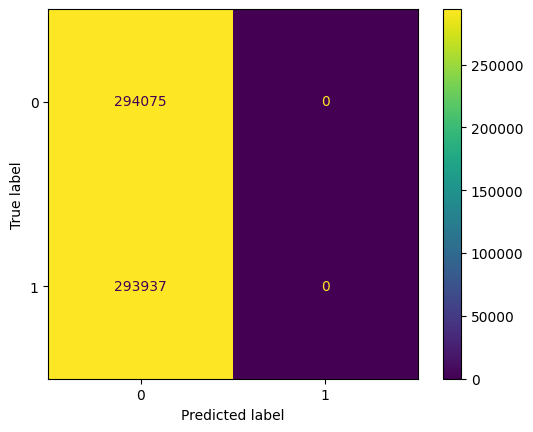

In [106]:


ConfusionMatrixDisplay.from_predictions(y_test_ml, y_pred)

In [100]:
prec = 262247 / (262247 + 74162)
prec

0.7795481095927873

In [101]:
accuracy = accuracy_score(y_test_ml, y_pred)
precision = precision_score(y_test_ml, y_pred)
recall = recall_score(y_test_ml, y_pred)
f1 = f1_score(y_test_ml, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

c:\Users\UKASHI\anaconda3\envs\e-library\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5001173445439889
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [54]:
classification_report_str = classification_report(y_test_ml, y_pred)
print("Classification Report:")
print(classification_report_str)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83    294075
           1       0.80      0.89      0.84    293937

    accuracy                           0.84    588012
   macro avg       0.84      0.84      0.83    588012
weighted avg       0.84      0.84      0.83    588012



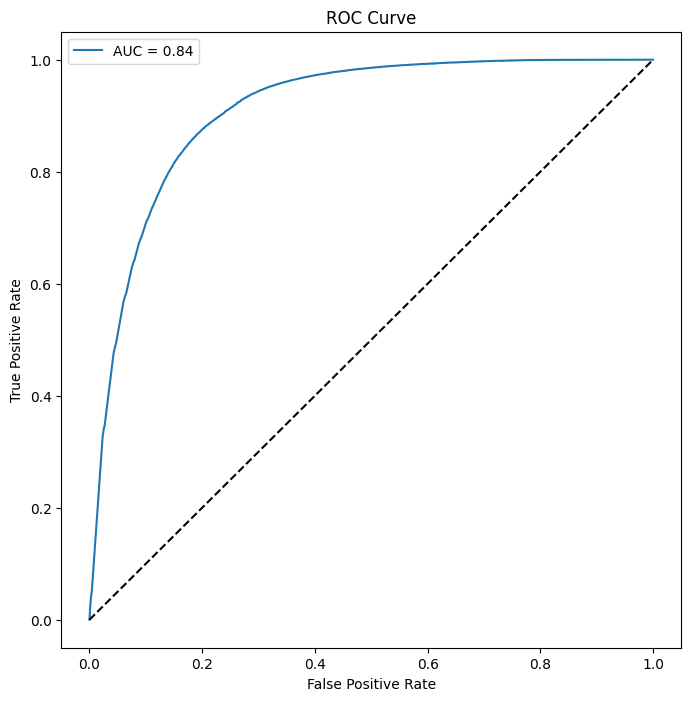

In [55]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_ml, logreg_model.predict_proba(X_test_ml_scaled_df)[:, 1])
auc = roc_auc_score(y_test_ml, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [56]:
feature_importance = pd.DataFrame({'Feature': X_test_ml_scaled_df.columns, 'Coefficient': logreg_model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
                 Feature  Coefficient
0            data_volume    14.772772
7          freq_top_pack    13.037005
1                 on_net    12.807125
5                  zone2     8.536454
2              Procuct_1     4.633035
4                  zone1     3.410647
26              top_pack     0.670050
3              Procuct_2     0.609415
22  tenure_G 12-15 month     0.504918
23  tenure_H 15-18 month     0.392571
21   tenure_F 9-12 month     0.367888
24  tenure_I 18-21 month     0.350454
20    tenure_E 6-9 month     0.284758
25  tenure_J 21-24 month     0.065452
12     region_Forcehaven    -1.808534
11        region_Eternum    -1.901128
18      region_Stellaris    -2.057352
17     region_Radiantara    -2.162699
13       region_Luminous    -2.256516
14         region_Nebula    -2.326427
8       region_Celestial    -2.328524
16         region_Quasar    -2.386266
9        region_Droidika    -2.392802
10      region_Eclipsara    -2.544916
15       region_Nebulith    -2

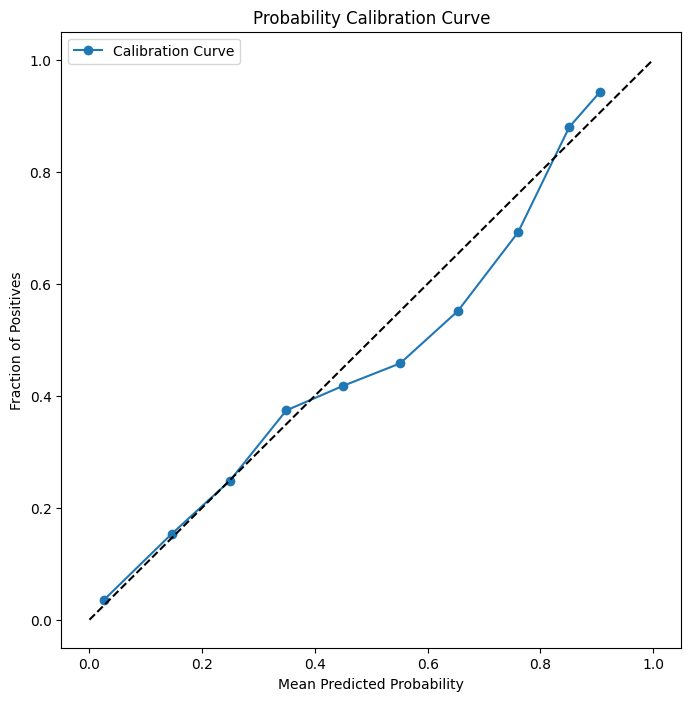

In [57]:
# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test_ml, logreg_model.predict_proba(X_test_ml_scaled_df)[:, 1], n_bins=10)

# Plot Calibration Curve
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Probability Calibration Curve')
plt.legend()
plt.show()

## Make another submission

In [121]:
test_data.isnull().sum()

ID                  0
region              0
tenure              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
zone1               0
zone2               0
mrg                 0
regularity          0
top_pack            0
freq_top_pack       0
dtype: int64

In [109]:
non_categorical_columns

['Amount',
 'refill_frequency',
 'revenue',
 'arpu_segment',
 'frequency',
 'data_volume',
 'on_net',
 'Procuct_1',
 'Procuct_2',
 'zone1',
 'zone2',
 'regularity',
 'freq_top_pack',
 'Target']

In [60]:
columns_to_use

['data_volume',
 'on_net',
 'Procuct_1',
 'Procuct_2',
 'zone1',
 'zone2',
 'regularity',
 'freq_top_pack',
 'region_Celestial',
 'region_Droidika',
 'region_Eclipsara',
 'region_Eternum',
 'region_Forcehaven',
 'region_Luminous',
 'region_Nebula',
 'region_Nebulith',
 'region_Quasar',
 'region_Radiantara',
 'region_Stellaris',
 'region_Zodiacalia',
 'tenure_E 6-9 month',
 'tenure_F 9-12 month',
 'tenure_G 12-15 month',
 'tenure_H 15-18 month',
 'tenure_I 18-21 month',
 'tenure_J 21-24 month',
 'top_pack',
 'Target']

In [61]:

## Using min-max scaler
test_combined = test_combined[columns_to_use[:-1]]


# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(test_combined)

# Convert the scaled data back to DataFrames
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_combined.columns)

In [62]:
# Predict on the scaled testing data
y_submission = logreg_model.predict(X_test_scaled_df)

In [63]:
submission_data = pd.read_csv('SampleSubmission.csv')
submission_data['Target'] = y_submission

submission_data.to_csv('optimized_logreg_model.csv', index=False)